In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/muham/OneDrive/Desktop/laptop_price predictor/dataset.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [2]:

df.drop(columns=['Unnamed: 0'],inplace=True) 

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float16')
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   str    
 1   TypeName          1303 non-null   str    
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   str    
 4   Cpu               1303 non-null   str    
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   str    
 7   Gpu               1303 non-null   str    
 8   OpSys             1303 non-null   str    
 9   Weight            1303 non-null   float16
 10  Price             1303 non-null   float64
dtypes: float16(1), float64(2), int32(1), str(7)
memory usage: 99.4 KB


C:\Users\muham\AppData\Local\Temp\ipykernel_11584\2688081179.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'],kde=True)


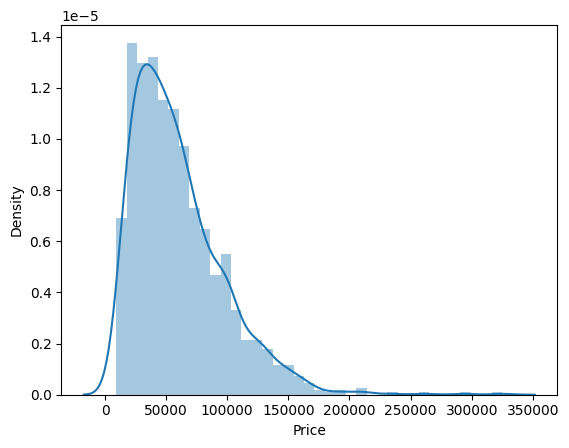

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df['Price'],kde=True)
plt.show()

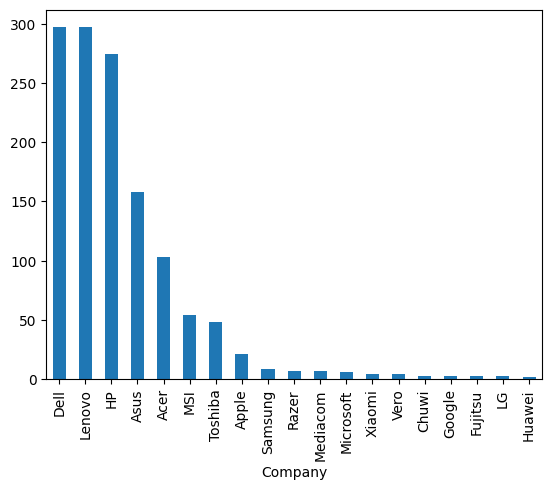

In [4]:
df['Company'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='Company'>

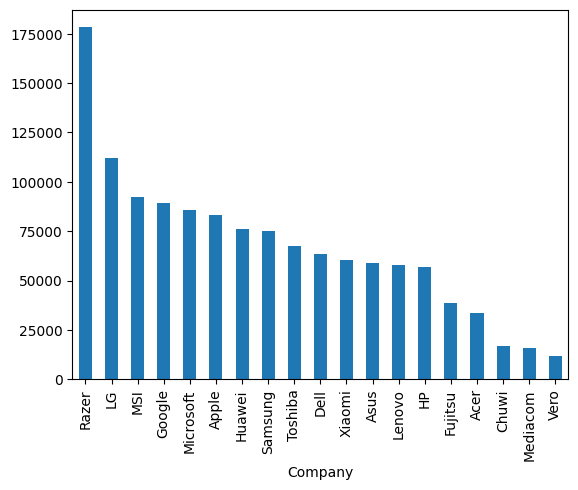

In [5]:
df.groupby(['Company'])['Price'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='TypeName'>

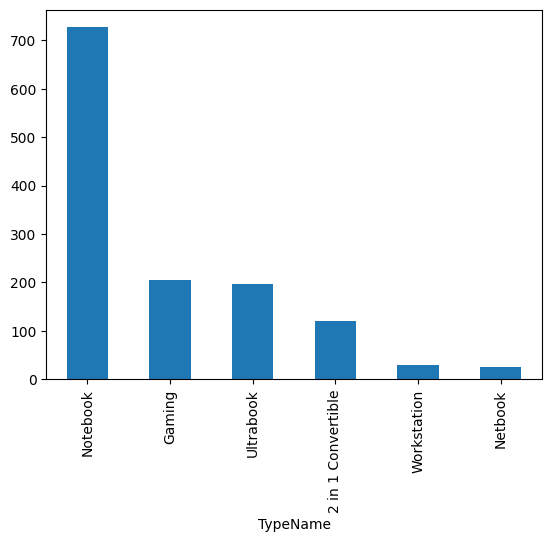

In [6]:
df['TypeName'].value_counts().plot(kind='bar')

In [7]:
df.head(1)

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832


<Axes: xlabel='Inches', ylabel='Price'>

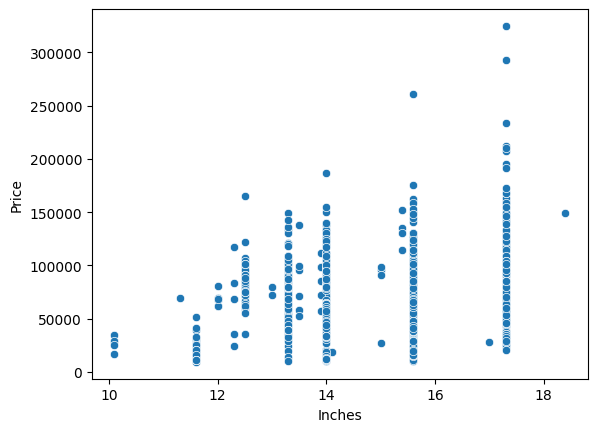

In [8]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [9]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [10]:
df['Touchscreen']  = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [11]:
df.sample(5)

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
455,Dell,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,500GB HDD,Intel HD Graphics 405,Windows 10,1.469727,25521.1200,1
583,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.929688,81912.1392,0
789,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.619141,52480.8000,0
1038,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,2.089844,56633.9760,0
443,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4,128GB SSD,Intel HD Graphics 505,Windows 10,2.199219,18594.7200,0


In [12]:
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

<Axes: xlabel='Touchscreen', ylabel='Price'>

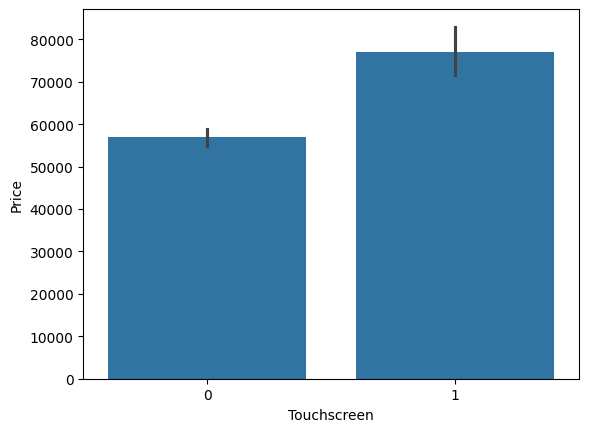

In [13]:
sns.barplot(x=df['Touchscreen'],y=df['Price'],estimator ='mean' )

In [14]:
df['ips']  = df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

In [15]:
df['y_resolution'] = df['ScreenResolution'].str.split('x').apply(lambda x : x[-1])

In [16]:
df['x_resolution'] = df['ScreenResolution'].str.split('x').apply(lambda x : x[0])

In [17]:
df['x_resolution'] = df['x_resolution'].str.split(' ').apply(lambda x : x[-1])

In [18]:
df.head(1)

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,y_resolution,x_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,1600,2560


In [19]:
df['x_resolution'] = df['x_resolution'].astype('int32')
df['y_resolution'] = df['y_resolution'].astype('int32')

In [20]:
df.head(1)

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,y_resolution,x_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,1600,2560


In [21]:
df.corr(numeric_only=True)['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210495
Price           1.000000
Touchscreen     0.191226
ips             0.252208
y_resolution    0.552809
x_resolution    0.556529
Name: Price, dtype: float64

In [22]:
df[['y_resolution', 'x_resolution','Inches']]

,y_resolution,x_resolution,Inches
0,1600,2560,13.3
1,900,1440,13.3
2,1080,1920,15.6
3,1800,2880,15.4
4,1600,2560,13.3
...,...,...,...
1298,1080,1920,14.0
1299,1800,3200,13.3
1300,768,1366,14.0
1301,768,1366,15.6


In [23]:
import numpy as np

In [24]:
df['ppi'] = np.sqrt(df['x_resolution']**2 + df['y_resolution']**2) / df['Inches']

In [25]:
df.head()

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,y_resolution,x_resolution,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,1600,2560,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.339844,47895.5232,0,0,900,1440,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.860352,30636.0000,0,0,1080,1920,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.830078,135195.3360,0,1,1800,2880,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.370117,96095.8080,0,1,1600,2560,226.983005


In [26]:
df.corr(numeric_only=True)['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210495
Price           1.000000
Touchscreen     0.191226
ips             0.252208
y_resolution    0.552809
x_resolution    0.556529
ppi             0.473487
Name: Price, dtype: float64

In [27]:
df.head(1)

c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,y_resolution,x_resolution,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,1600,2560,226.983005


In [28]:
df.drop(columns=['x_resolution','y_resolution','Inches'],inplace=True)

In [ ]:
a = df['Cpu'].str.split(' ').apply(lambda x :x[0:3])
a.apply(lambda x : )

0            [Intel, Core, i5]
1            [Intel, Core, i5]
2            [Intel, Core, i5]
3            [Intel, Core, i7]
4            [Intel, Core, i5]
                 ...          
1298         [Intel, Core, i7]
1299         [Intel, Core, i7]
1300    [Intel, Celeron, Dual]
1301         [Intel, Core, i7]
1302    [Intel, Celeron, Dual]
Name: Cpu, Length: 1303, dtype: object

In [68]:
df['cpu name'] = df['Cpu'].apply(lambda x : ' '.join(x.split()[0:3]))

In [69]:
df


c:\Users\muham\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\io\formats\format.py:1466: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,cpu name
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.370117,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.339844,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.860352,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.830078,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.370117,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.799805,33992.6400,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.299805,79866.7200,1,1,276.053530,Intel Core i7
1300,Lenovo,Notebook,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.500000,12201.1200,0,0,111.935204,Intel Celeron Dual
1301,HP,Notebook,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.189453,40705.9200,0,0,100.454670,Intel Core i7
